In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline
mpl.style.use('ggplot')

# Introduction

This dataset contains information about the accidents that occur in United Kingdom.

# Let's take a look at the data

In [2]:
accidents=pd.read_csv('UK_Acc.csv',low_memory=False)
vehicles=pd.read_csv('Veh.csv',low_memory=False)
accidents.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2017010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,3,05/08/2017,...,0,0,4,1,1,0,0,1,1,E01001450
1,2017010009342,526790.0,181970.0,-0.173845,51.522425,1,3,2,1,01/01/2017,...,0,0,4,1,2,0,0,1,1,E01004702
2,2017010009344,535200.0,181260.0,-0.052969,51.514096,1,3,3,1,01/01/2017,...,0,0,4,1,1,0,0,1,1,E01004298
3,2017010009348,534340.0,193560.0,-0.060658,51.624832,1,3,2,1,01/01/2017,...,0,4,4,2,2,0,0,1,1,E01001429
4,2017010009350,533680.0,187820.0,-0.072372,51.573408,1,2,1,1,01/01/2017,...,0,5,4,1,2,0,0,1,1,E01001808


# Missing data handling

In [3]:
accidents['Date']=accidents['Date'].str.cat(accidents['Time'],sep=' ')
accidents.rename(columns={'Date':'Date_And_Time'},inplace=True)


In [4]:
accidents.replace('-1',np.nan,inplace=True)
accidents.replace(-1,np.nan,inplace=True)

# Analysis

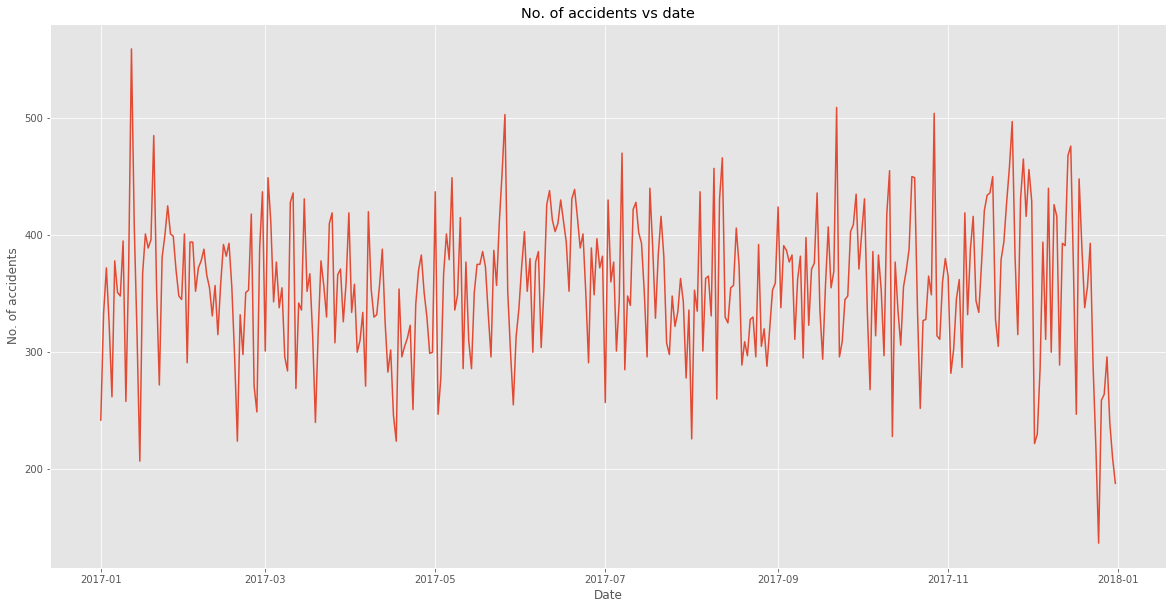

In [5]:
# 1 Graph of no. of accidents vs date
accidents['Date_And_Time']=pd.to_datetime(accidents['Date_And_Time'])
accidents['Date']=accidents['Date_And_Time'].dt.date
accidents.groupby('Date')['Date'].agg('count').plot(figsize=(20,10))
plt.title('No. of accidents vs date')
plt.ylabel('No. of accidents')
plt.show()

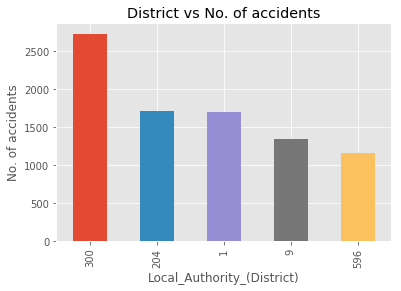

In [6]:
# 2 Which district has most no. of accidents
accidents.groupby('Local_Authority_(District)',axis=0)['Local_Authority_(District)'].agg('count').sort_values(ascending=False).head().plot(kind='bar')
plt.title('District vs No. of accidents')
plt.ylabel('No. of accidents')
plt.show()

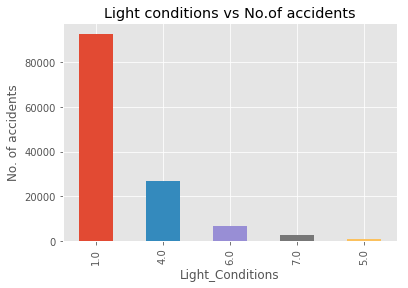

In [7]:
# 3 At what light conditions most accidents occur
accidents.groupby('Light_Conditions',axis=0)['Light_Conditions'].agg('count').sort_values(ascending=False).head().plot(kind='bar')
plt.ylabel('No. of accidents')
plt.title("Light conditions vs No.of accidents")
plt.show()

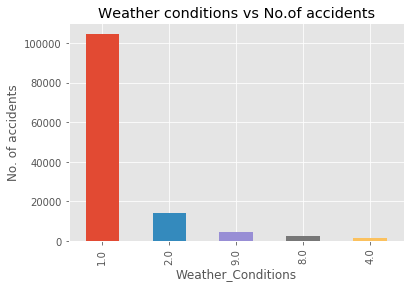

In [8]:
# 4 At what weather conditions most accidents occur
accidents.groupby('Weather_Conditions',axis=0)['Weather_Conditions'].agg('count').sort_values(ascending=False).head().plot(kind='bar')
plt.ylabel('No. of accidents')
plt.title("Weather conditions vs No.of accidents")
plt.show()

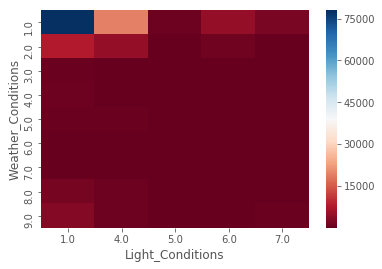

In [9]:
# 5 Heatmap of No. of accidents occurred at particular weather and light conditions
pivot=accidents.pivot_table(index='Weather_Conditions',columns='Light_Conditions',values='1st_Road_Class',aggfunc='count')
sns.heatmap(pivot,cmap='RdBu')

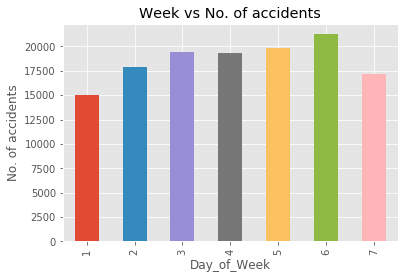

In [10]:
# 6 Bar graph of no. of accidents vs day of week
accidents.groupby('Day_of_Week')['Day_of_Week'].agg('count').plot(kind='bar')
plt.title('Week vs No. of accidents')
plt.ylabel('No. of accidents')
plt.show()

In [11]:
# 7 Which Highway is worst and at which light conditions
accidents.groupby(['Local_Authority_(Highway)','Light_Conditions'])['Light_Conditions'].agg('count').sort_values(ascending=False).head(10)
#''' Highway E10000016 is the worst highway at light conditions 1'''

Local_Authority_(Highway)  Light_Conditions
E10000016                  1.0                 3034
E10000030                  1.0                 2661
E10000014                  1.0                 1925
E10000017                  1.0                 1919
E10000012                  1.0                 1900
E08000025                  1.0                 1860
E10000015                  1.0                 1609
E10000019                  1.0                 1424
E10000032                  1.0                 1405
E10000020                  1.0                 1316
Name: Light_Conditions, dtype: int64

# Analysis of Accident Vehicles 

In [12]:
vehicles.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2017010001708,1,9,0,18,0,0,0,0,0,...,6,1,24,5,1997,2,1,-1,-1,-1
1,2017010001708,2,2,0,18,0,0,1,0,0,...,6,1,19,4,-1,-1,-1,-1,-1,-1
2,2017010009342,1,9,0,18,0,1,0,0,0,...,6,1,33,6,1797,8,8,9,1,9
3,2017010009342,2,9,0,18,0,1,1,0,0,...,6,1,40,7,2204,2,12,2,1,2
4,2017010009344,1,9,0,18,0,1,0,0,0,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1


In [13]:
#  Bar graph between Males and Females involved in  accidents by month


In [14]:
accidents['Month']=accidents['Date_And_Time'].dt.month
accidents.sort_values('Date',inplace=True)
left=accidents.xs(['Accident_Index','Month'],axis=1)
result=pd.merge(left,vehicles,how='left',on='Accident_Index')

In [15]:
result.replace('-1',np.nan,inplace=True)
result.replace(-1,np.nan,inplace=True)

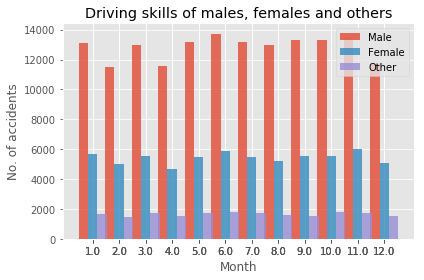

In [16]:
mft=result.groupby(['Month','Sex_of_Driver'],as_index=False)['Accident_Index'].agg('count')
male=mft[mft.Sex_of_Driver==1.0]
female=mft[mft.Sex_of_Driver==2.0]
tri=mft[mft.Sex_of_Driver==3.0]
bar_width=0.35
plt.bar(male.Month,male.Accident_Index,bar_width,alpha=.8,label='Male')
plt.bar(female.Month+bar_width,female.Accident_Index,bar_width,alpha=.8,label='Female')
plt.bar(tri.Month+bar_width*2,tri.Accident_Index,bar_width,alpha=.8,label='Other')
plt.xticks(mft.Month+bar_width,mft.Month)
plt.legend()
plt.title('Driving skills of males, females and others')
plt.xlabel('Month')
plt.ylabel('No. of accidents')
plt.tight_layout()
plt.show()
